<a href="https://colab.research.google.com/github/Jan2309jr/deepCSAT/blob/main/deepcsat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - DeepCSAT : Ecommerce Customer Satisfaction Score Prediction




##### **Project Type**    - Supervised learning using artificial neural networks
##### **Contribution**    - Individual
##### **By - Janani Ravi**

# **Project Summary -**

This project aims to predict Customer Satisfaction (CSAT) scores using Deep Learning Artificial Neural Networks (ANN). By leveraging customer interaction data and feedback, the model forecasts satisfaction levels with high precision. The system provides actionable insights that help e-commerce businesses enhance service quality, boost customer loyalty, and support data-driven decision-making for continuous improvement.

# **GitHub Link -**

[Click here](https://github.com/Jan2309jr/deepCSAT.git)

# **Problem Statement**


Customer satisfaction (CSAT) is a key factor that drives customer retention, loyalty, and overall business growth in the e-commerce industry. Traditional survey-based methods for measuring satisfaction are often time-consuming and fail to capture real-time customer sentiments. The challenge is to accurately predict CSAT scores using interaction-based data to identify service gaps and improve performance.

# ***Implementation***

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## ***1. Getting Familiar with the Dataset***

In [2]:
# Load Dataset
url='https://drive.google.com/uc?export=download&id=10pFYAEZqnZ9mQHUrxly7xwe9qRKL7uM5'
df=pd.read_csv(url)

In [3]:
# Dataset First Look
df.head()

/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [4]:
# Dataset Rows & Columns count
print("rows:",df.shape[0])
print("columns:",df.shape[1])

rows: 85907
columns: 20


In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


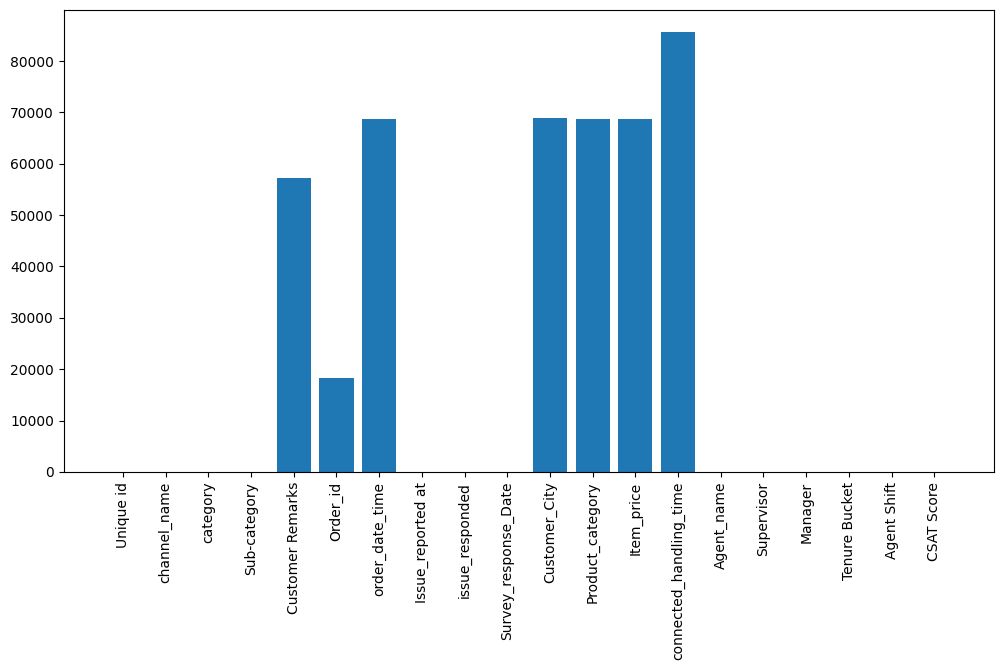

In [8]:
# Visualizing the missing values
plt.figure(figsize=(12,6))
plt.bar(df.columns,df.isnull().sum())
plt.tick_params(axis='x',rotation=90)
plt.show()

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns.tolist()

['Unique id',
 'channel_name',
 'category',
 'Sub-category',
 'Customer Remarks',
 'Order_id',
 'order_date_time',
 'Issue_reported at',
 'issue_responded',
 'Survey_response_Date',
 'Customer_City',
 'Product_category',
 'Item_price',
 'connected_handling_time',
 'Agent_name',
 'Supervisor',
 'Manager',
 'Tenure Bucket',
 'Agent Shift',
 'CSAT Score']

In [10]:
# Dataset Describe
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


In [11]:
# Check Unique Values for each variable.
df.nunique()

,0
Unique id,85907
channel_name,3
category,12
Sub-category,57
Customer Remarks,18231
Order_id,67675
order_date_time,13766
Issue_reported at,30923
issue_responded,30262
Survey_response_Date,31


## 3. ***Data Wrangling***

In [12]:
#Removing irrelevant columns
df.drop(["Unique id","channel_name","Customer_City", "Order_id","Customer Remarks","order_date_time","Product_category","Item_price","connected_handling_time"], axis=1, inplace=True)

In [13]:
# Standardizing the columns
df.rename(columns={
    "Satisfaction Score": "satisfaction_score",
    "category": "Category",
    "Sub-category": "Sub Category",
    "Issue_reported at": "Issue Reported At",
    "issue_responded": "Issue Responded At",
    "Survey_response_Date": "Survey Response Date",
    "Agent_name": "Agent Name"
}, inplace=True)

In [14]:
# Formatting Date and Time Columns
df["Issue Reported At"] = pd.to_datetime(df["Issue Reported At"], errors='coerce')
df["Issue Responded At"] = pd.to_datetime(df["Issue Responded At"], errors='coerce')
df["Survey Response Date"] = pd.to_datetime(df["Survey Response Date"], errors='coerce')

/tmp/ipython-input-645402022.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Survey Response Date"] = pd.to_datetime(df["Survey Response Date"], errors='coerce')


In [15]:
df.head()

,Category,Sub Category,Issue Reported At,Issue Responded At,Survey Response Date,Agent Name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,Product Queries,Life Insurance,2023-01-08 11:13:00,2023-01-08 11:47:00,2023-08-01,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,Product Queries,Product Specific Information,2023-01-08 12:52:00,2023-01-08 12:54:00,2023-08-01,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,Order Related,Installation/demo,2023-01-08 20:16:00,2023-01-08 20:38:00,2023-08-01,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,Returns,Reverse Pickup Enquiry,2023-01-08 20:56:00,2023-01-08 21:16:00,2023-08-01,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,Cancellation,Not Needed,2023-01-08 10:30:00,2023-01-08 10:32:00,2023-08-01,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [16]:
df.shape

(85907, 11)

## ***4. Exploratoty Data Analysis***

Text(0.5, 1.0, 'Distribution of CSAT Scores')

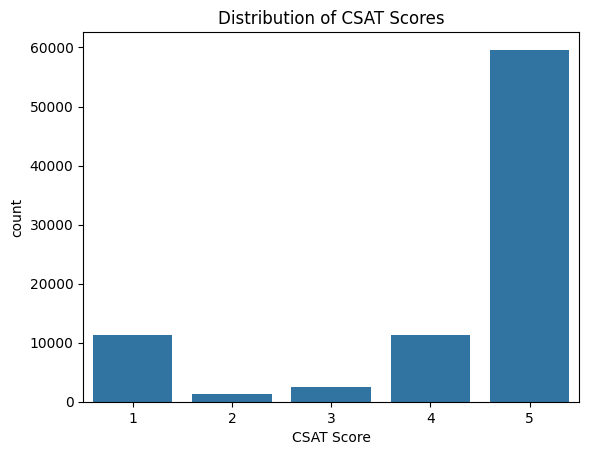

In [17]:
#Csat score distribution
sns.countplot(x='CSAT Score', data=df)
plt.title('Distribution of CSAT Scores')

<Axes: xlabel='count', ylabel='Category'>

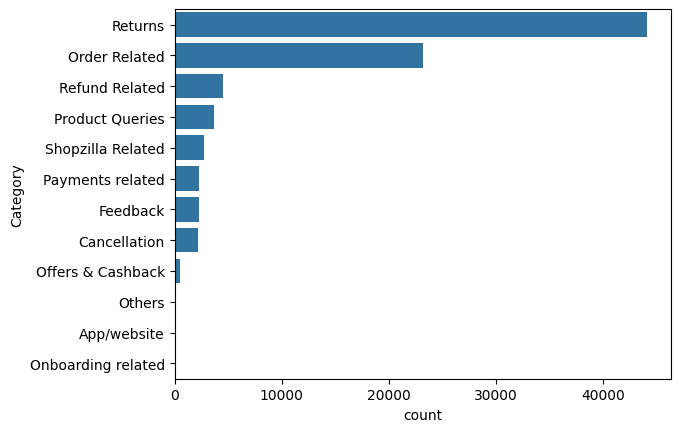

In [18]:
#Category featuring
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)

<Axes: ylabel='Sub Category'>

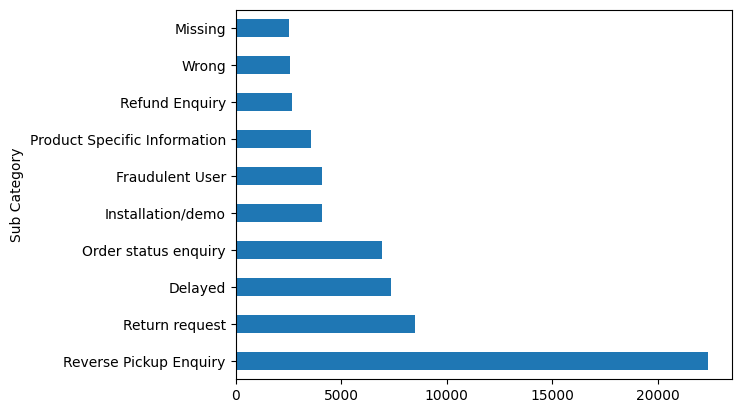

In [19]:
#sub category featuring
df['Sub Category'].value_counts().head(10).plot(kind='barh')

<Axes: xlabel='Tenure Bucket', ylabel='count'>

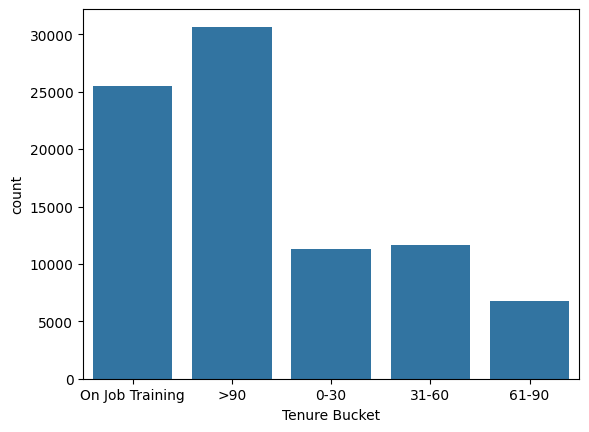

In [20]:
#tenure bucket distribution
sns.countplot(x='Tenure Bucket', data=df)

In [21]:
#Response Time Calculation(adding new feature)
df['Response_Time_Mins'] = (df['Issue Responded At'] - df['Issue Reported At']).dt.total_seconds() / 60

<Axes: xlabel='Agent Shift', ylabel='Response_Time_Mins'>

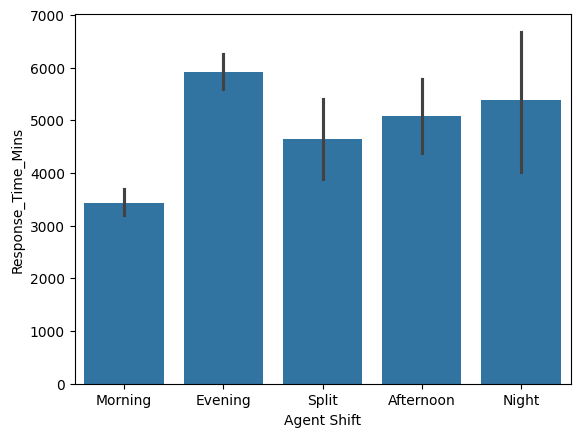

In [22]:
# Average Response Time by Shift
sns.barplot(x='Agent Shift', y='Response_Time_Mins', data=df)

<Axes: xlabel='Issue Reported At'>

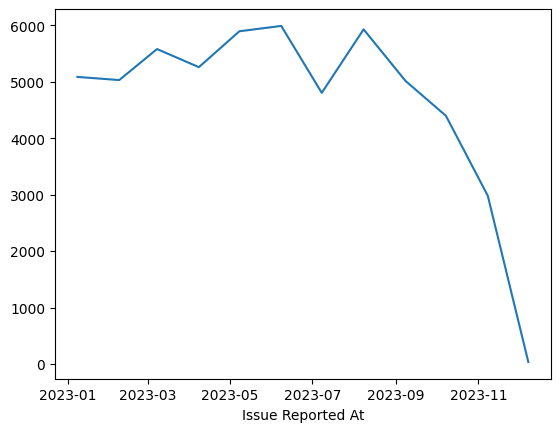

In [23]:
# Response Time Trend Over Time
df.groupby(df['Issue Reported At'].dt.date)['Response_Time_Mins'].mean().plot()

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


<Axes: xlabel='Survey Response Date'>

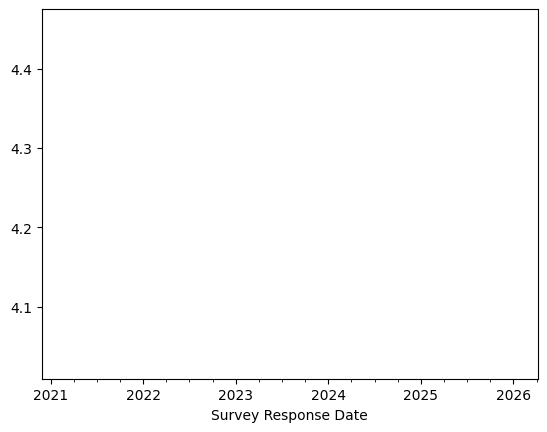

In [24]:
#CSAT Over Time
df.groupby(df['Survey Response Date'].dt.to_period('M'))['CSAT Score'].mean().plot(kind='line')

<Axes: title={'center': 'Top 10 Agents by Avg CSAT'}, ylabel='Agent Name'>

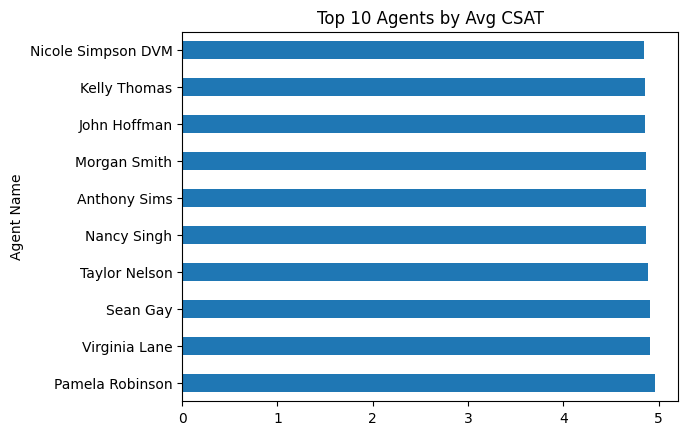

In [25]:
#Average CSAT by Agent
top_agents = df.groupby('Agent Name')['CSAT Score'].mean().sort_values(ascending=False).head(10)
top_agents.plot(kind='barh', title='Top 10 Agents by Avg CSAT')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Wendy Mitchell'),
  Text(1, 0, 'Eric Miller MD'),
  Text(2, 0, 'Robert Miranda'),
  Text(3, 0, 'Kathryn Jones'),
  Text(4, 0, 'Kelsey Massey'),
  Text(5, 0, 'Haley White'),
  Text(6, 0, 'Renee Martin'),
  Text(7, 0, 'Catherine Gibson'),
  Text(8, 0, 'Tammy Mcneil'),
  Text(9, 0, 'Carolyn Sullivan')])

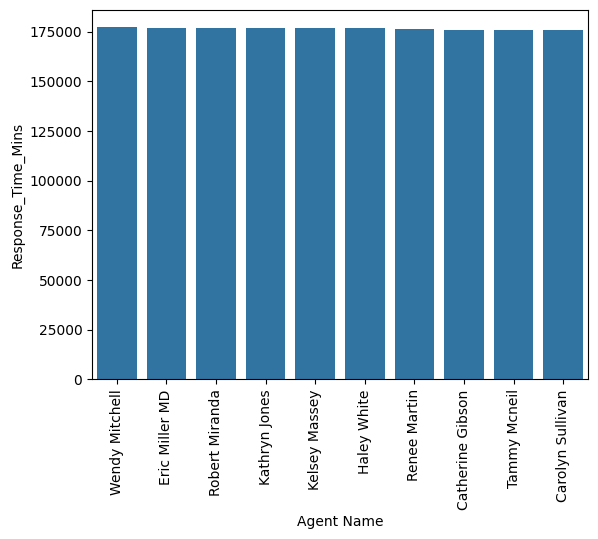

In [26]:
#Average Response Time by Agent
sns.barplot(x='Agent Name', y='Response_Time_Mins', data=df.sort_values('Response_Time_Mins', ascending=False).head(10))
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, 'Mason Gupta'),
  Text(1, 0, 'Dylan Kim'),
  Text(2, 0, 'Jackson Park'),
  Text(3, 0, 'Olivia Wang'),
  Text(4, 0, 'Austin Johnson'),
  Text(5, 0, 'Emma Park'),
  Text(6, 0, 'Aiden Patel'),
  Text(7, 0, 'Evelyn Kimura'),
  Text(8, 0, 'Nathan Patel'),
  Text(9, 0, 'Amelia Tanaka'),
  Text(10, 0, 'Harper Wong'),
  Text(11, 0, 'Zoe Yamamoto'),
  Text(12, 0, 'Scarlett Chen'),
  Text(13, 0, 'Sophia Sato'),
  Text(14, 0, 'Wyatt Kim'),
  Text(15, 0, 'Logan Lee'),
  Text(16, 0, 'Mia Patel'),
  Text(17, 0, 'William Park'),
  Text(18, 0, 'Emily Yamashita'),
  Text(19, 0, 'Madison Kim'),
  Text(20, 0, 'Noah Patel'),
  Text(21, 0, 'Oliver Nguyen'),
  Text(22, 0, 'Elijah Yamaguchi'),
  Text(23, 0, 'Layla Taniguchi'),
  Text(24, 0, 'Isabella Wong'),
  Text(25,

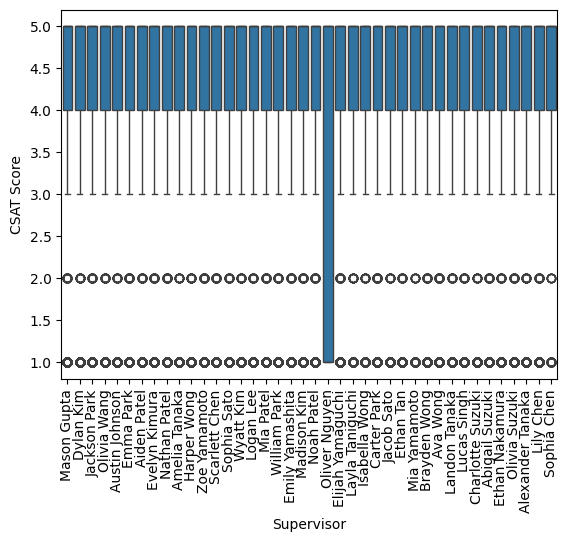

In [27]:
#Supervisor vs. Average CSAT
sns.boxplot(x='Supervisor', y='CSAT Score', data=df)
plt.xticks(rotation=90)

<Axes: >

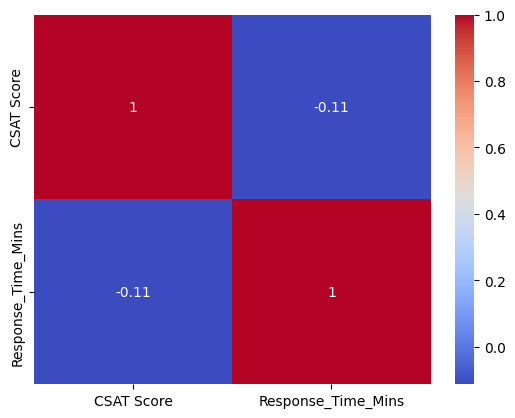

In [28]:
# Correlation Heatmap (numeric features only)
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='Response_Time_Mins', ylabel='CSAT Score'>

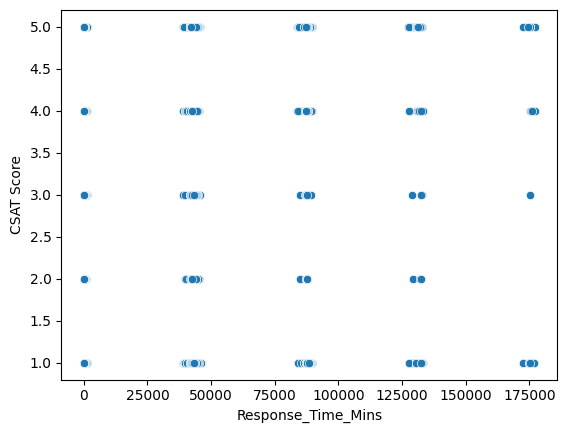

In [29]:
#Response Time vs. CSAT
sns.scatterplot(x='Response_Time_Mins', y='CSAT Score', data=df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Product Queries'),
  Text(1, 0, 'Order Related'),
  Text(2, 0, 'Returns'),
  Text(3, 0, 'Cancellation'),
  Text(4, 0, 'Shopzilla Related'),
  Text(5, 0, 'Payments related'),
  Text(6, 0, 'Refund Related'),
  Text(7, 0, 'Feedback'),
  Text(8, 0, 'Offers & Cashback'),
  Text(9, 0, 'Onboarding related'),
  Text(10, 0, 'Others'),
  Text(11, 0, 'App/website')])

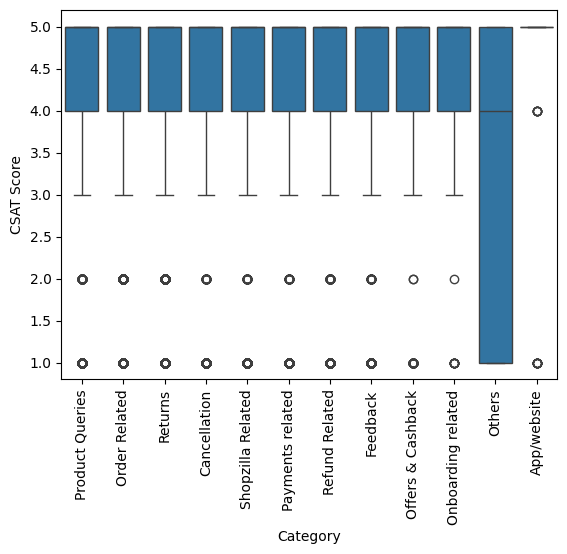

In [30]:
#Category vs. CSAT
sns.boxplot(x='Category', y='CSAT Score', data=df)
plt.xticks(rotation=90)

<Axes: xlabel='Agent Shift', ylabel='CSAT Score'>

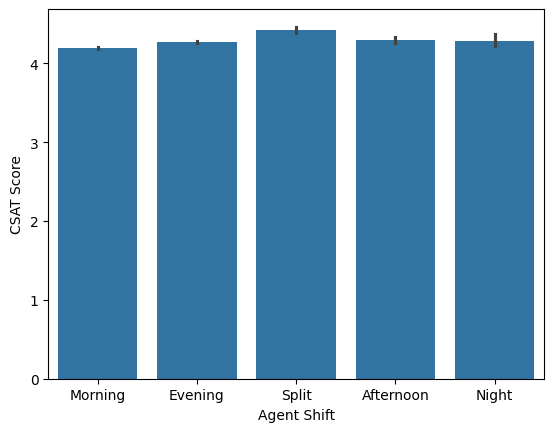

In [31]:
#Shift vs. CSAT
sns.barplot(x='Agent Shift', y='CSAT Score', data=df)

<Axes: xlabel='Tenure Bucket', ylabel='CSAT Score'>

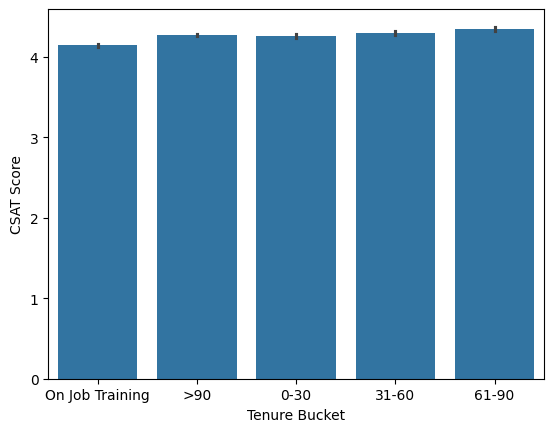

In [32]:
#Tenure vs. CSAT
sns.barplot(x='Tenure Bucket', y='CSAT Score', data=df)

<Axes: xlabel='Tenure Bucket', ylabel='Response_Time_Mins'>

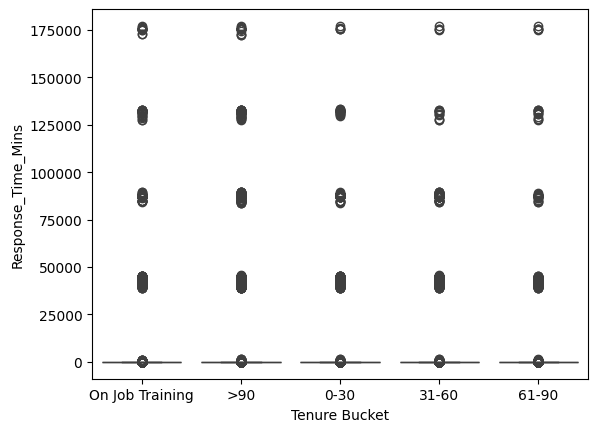

In [33]:
# Tenure vs. Response Time
sns.boxplot(x='Tenure Bucket', y='Response_Time_Mins', data=df)

<Axes: title={'center': 'Average CSAT by Manager'}, xlabel='Manager'>

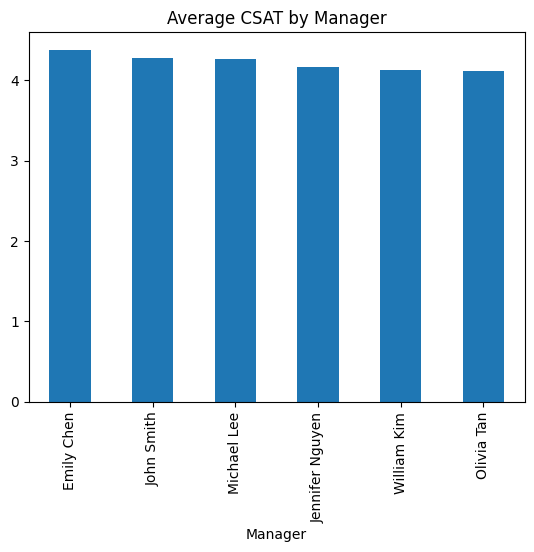

In [34]:
#Manager-wise Avg CSAT
manager_csat = df.groupby('Manager')['CSAT Score'].mean().sort_values(ascending=False)
manager_csat.plot(kind='bar', title='Average CSAT by Manager')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Jennifer Nguyen'),
  Text(1, 0, 'Michael Lee'),
  Text(2, 0, 'William Kim'),
  Text(3, 0, 'John Smith'),
  Text(4, 0, 'Olivia Tan'),
  Text(5, 0, 'Emily Chen')])

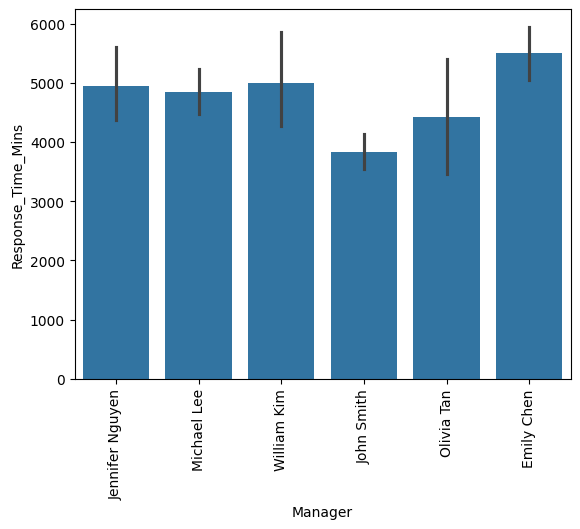

In [35]:
#Manager vs. Average Response Time
sns.barplot(x='Manager', y='Response_Time_Mins', data=df)
plt.xticks(rotation=90)

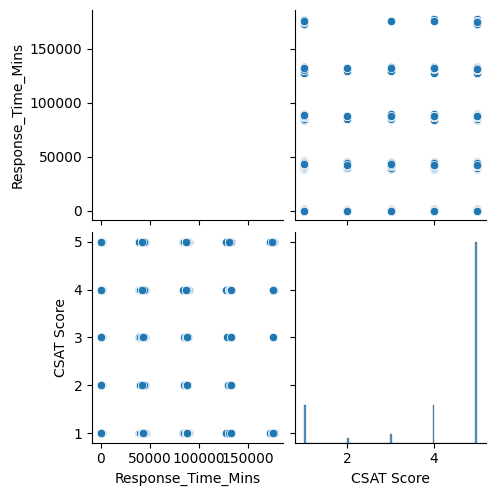

In [36]:
#Pairplot for numerical relations
sns.pairplot(df[['Response_Time_Mins', 'CSAT Score']])

<Axes: xlabel='Category', ylabel='Response_Time_Mins'>

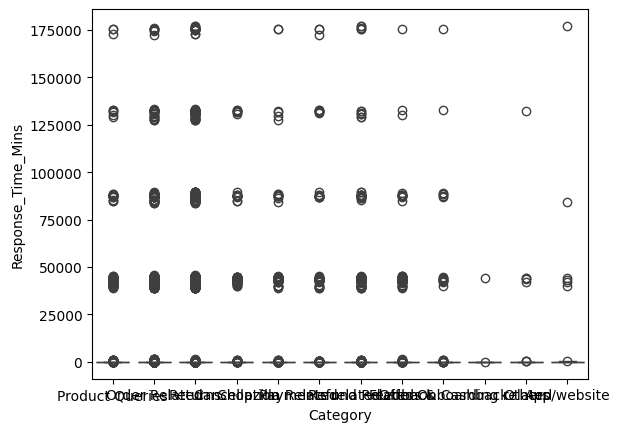

In [37]:
#Category vs. Response Time
sns.boxplot(x='Category', y='Response_Time_Mins', data=df)

<Axes: >

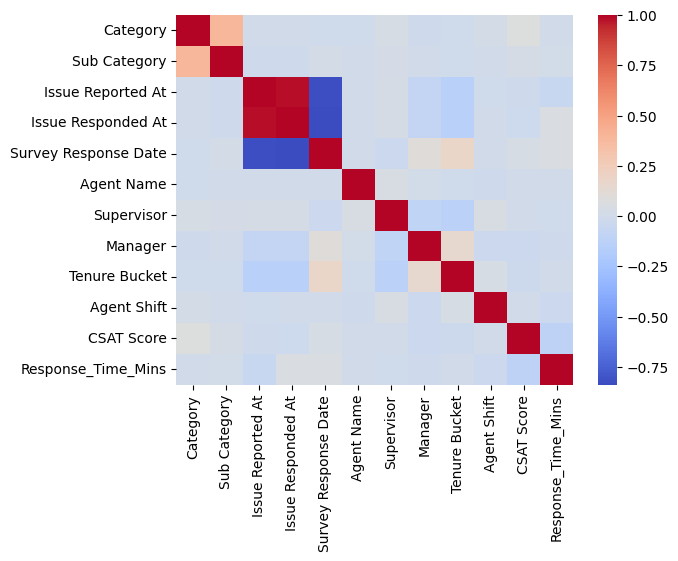

In [38]:
# Heatmap for Encoded Categorical Variables (after label encoding)
encoded_df = df.copy()
# Encode categorical columns to numeric first
from sklearn.preprocessing import LabelEncoder
for col in df.select_dtypes(include='object'):
    encoded_df[col] = LabelEncoder().fit_transform(df[col])
sns.heatmap(encoded_df.corr(), cmap='coolwarm')

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [39]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [40]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [41]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [42]:
# Expand Contraction

#### 2. Lower Casing

In [43]:
# Lower Casing

#### 3. Removing Punctuations

In [44]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [45]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [46]:
# Remove Stopwords

In [47]:
# Remove White spaces

#### 6. Rephrase Text

In [48]:
# Rephrase Text

#### 7. Tokenization

In [49]:
# Tokenization

#### 8. Text Normalization

In [50]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [51]:
# POS Taging

#### 10. Text Vectorization

In [52]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [53]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [54]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [55]:
# Transform Your data

### 6. Data Scaling

In [56]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [57]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [58]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [59]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***6. ML Model Implementation***

### ML Model - 1

### ML Model - 2

# **Conclusion**

Write the conclusion here.